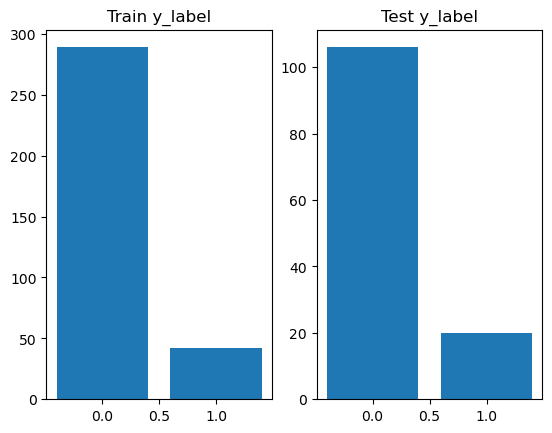

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, Flatten

#from input_output_data1 import X_test, X_train, y_train_5, y_test_5
from data_cancer_seq import X_test_seq, X_train_seq, y_train, y_test

In [3]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# CNN-LSTM 모델 구축
model = Sequential()

# TimeDistributed를 이용해 각 프레임에 ResNet50 적용 (프레임마다 CNN 적용)
model.add(TimeDistributed(base_model, input_shape=(5, 224, 224, 3)))

# ResNet50 출력된 특징을 Flatten으로 펼침
model.add(TimeDistributed(Flatten()))

model.add(LSTM(50, return_sequences=True))
model.add(LSTM(5, return_sequences=False))


model.add(Dense(1))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 5, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 5, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20080600  
                                                                 
 lstm_2 (LSTM)               (None, 5)                 1120      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 43,669,438
Trainable params: 20,081,726


In [4]:
model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=5, batch_size=16)

Epoch 1/10
21/21 [==============================] - 74s 3s/step - loss: 1.2799 - accuracy: 0.1390 - val_loss: 0.7023 - val_accuracy: 0.1587
Epoch 2/10
21/21 [==============================] - 69s 3s/step - loss: 0.5669 - accuracy: 0.8610 - val_loss: 0.4997 - val_accuracy: 0.8413
Epoch 3/10
21/21 [==============================] - 70s 3s/step - loss: 0.4333 - accuracy: 0.8731 - val_loss: 0.4453 - val_accuracy: 0.8413
Epoch 4/10
21/21 [==============================] - 70s 3s/step - loss: 0.3877 - accuracy: 0.8731 - val_loss: 0.4388 - val_accuracy: 0.8413
Epoch 5/10
21/21 [==============================] - 69s 3s/step - loss: 0.3846 - accuracy: 0.8731 - val_loss: 0.4439 - val_accuracy: 0.8413
Epoch 6/10
21/21 [==============================] - 70s 3s/step - loss: 0.3815 - accuracy: 0.8731 - val_loss: 0.4402 - val_accuracy: 0.8413
Epoch 7/10
21/21 [==============================] - 70s 3s/step - loss: 0.3819 - accuracy: 0.8731 - val_loss: 0.4432 - val_accuracy: 0.8413
Epoch 8/10
21/21 [==

In [7]:
pred = model.predict(X_test_seq)

4/4 [==============================] - 19s 4s/step
